In [1]:
using JLD

In [12]:
push!(LOAD_PATH, "../CSDA/")

5-element Array{String,1}:
 "@"                   
 "@v#.#"               
 "@stdlib"             
 "../Preprocesamiento/"
 "../CSDA/"            

In [3]:
arx="/home/karel/ElectroNeuroTools/JLDFiles/4AP/DatosLFP4APusadosPaper.jld"
dic=jldopen(arx)
names(dic)

4-element Array{String,1}:
 "CSDALindenberg"
 "LFP"           
 "kCSDCorrecta"  
 "notacsd"       

In [4]:
csda=read(dic["CSDALindenberg"])
lfp=read(dic["LFP"]);
freq=7.022 # por default en la matriz vieja, kHz

7.022

In [5]:
n=300
(a,b,nmax)=size(lfp)

(64, 64, 1402)

In [6]:
using PyPlot

In [7]:
using Statistics

In [8]:
slfp=std(lfp)
scsd=std(csda)

55.35047f0

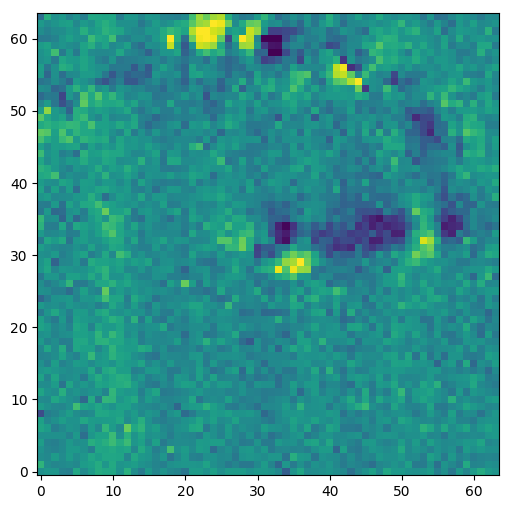

PyObject <matplotlib.image.AxesImage object at 0x7f68583130b8>

In [9]:
ff=figure(figsize=(6,6))
v=5*slfp

n=700
imshow(lfp[:,:,n], vmin=-v, vmax=v, origin="lower", interpolation="nearest")

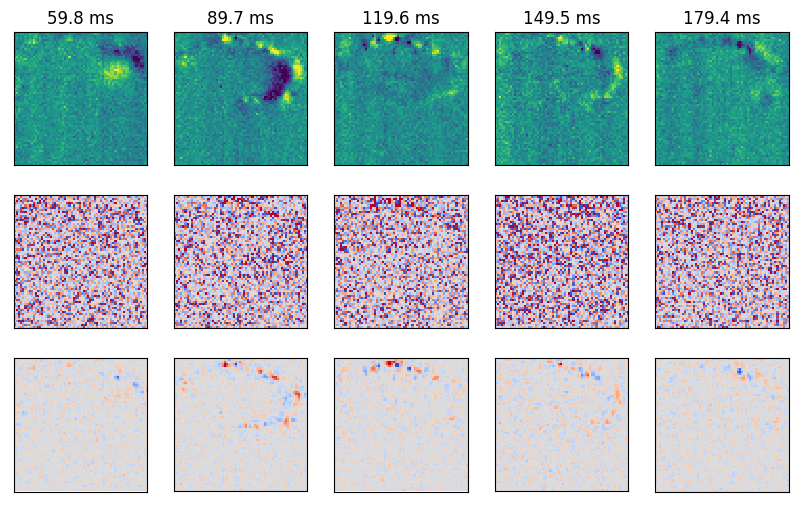

In [18]:
l=2
farofa,lista=subplots(3,5, figsize=(5*l, 3*l))
sens=5.0
vl=sens*slfp
vc=sens*scsd/3
paso=210

for j=1:5
    
    n=paso*(j+1)
    t=round(n/freq, digits=1)
    
    lista[1,j].set_title("$t ms")
    lista[1,j].imshow(lfp[:,:,n], vmin=-vl, vmax=vl, origin="lower")
    lista[2,j].imshow(csda[:,:,n], vmin=-vc, vmax=vc, origin="lower", cmap="coolwarm")
    lista[3,j].imshow(aux1[:,:,n], vmin=-vc, vmax=vc, origin="lower", cmap="coolwarm")    
    
    for k in (1,2,3)
    lista[k,j].set_xticks([])
    lista[k,j].set_yticks([])
    end    
    
end



In [13]:
using LindenbergOperadores

In [14]:

aux1=zeros(a,b,nmax)
for n=1:nmax
   # aux1[:,:,t]=GaussianSmooth(lfpplanchado[:,:,t])
    aux1[:,:,n]=GaussianSmooth(csda[:,:,n])
end
